# Regression to predict Red Wine Quality

*explanation on usecase*

## Import Libraries

### Standard Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

### Additional Libraries

In [2]:
#Train-Test Split
from sklearn.model_selection import train_test_split

#Linear Regression Algorithm from sklearn (Linear, Lasso, and Ridge Regression)
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Lasso, Ridge

#Metrics to measure model performance (r2, mae, and mse)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline

## Load and Explore the Dataset

In [3]:
#Load the dataset
df = pd.read_csv("winequality-red.csv")

#Display the dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Describe the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Correlation

In [5]:
#Get the correlation of the attributes
corr = df.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


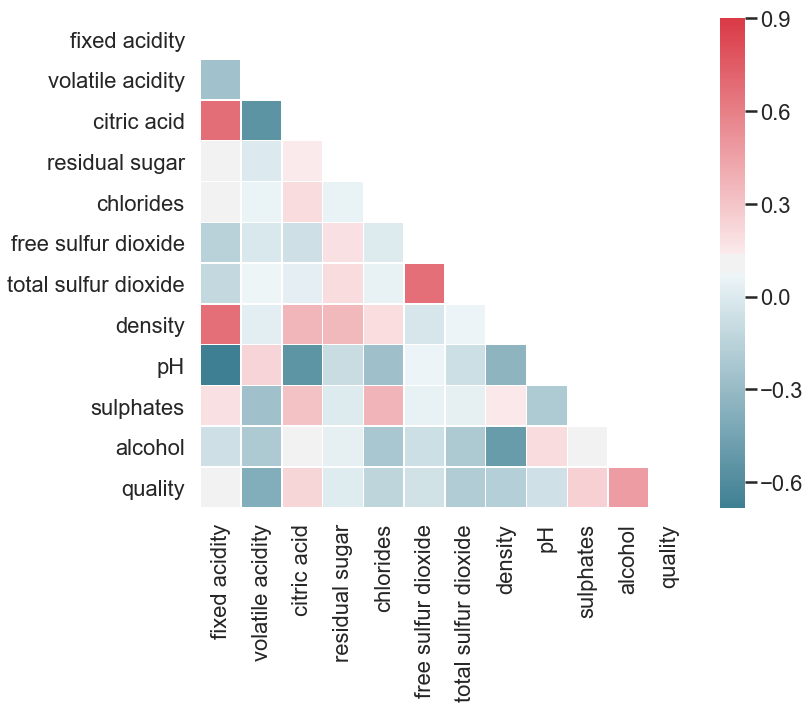

In [6]:
#Visualize Correlation

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax)

## Build the Model

In [7]:
#Split the dataset to training and testing set

df_train, df_test = train_test_split(df, test_size=0.25, random_state=35)
x_train = df_train[['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'total sulfur dioxide', 'density', 'chlorides', 'fixed acidity', 'residual sugar', 'pH', 'free sulfur dioxide']]
y_train = df_train['quality']

x_test = df_test[['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'total sulfur dioxide', 'density', 'chlorides', 'fixed acidity', 'residual sugar', 'pH', 'free sulfur dioxide']]
y_test = df_test['quality']

### Linear Regression

In [8]:
# Linear Regression

clf = linear_model.LinearRegression()
clf.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
pd.DataFrame(clf.coef_, index=x_train.columns, columns=['Coef'])

,Coef
alcohol,0.287202
volatile acidity,-1.151795
sulphates,0.832288
citric acid,-0.174091
total sulfur dioxide,-0.002438
density,-13.742713
chlorides,-1.870215
fixed acidity,0.023861
residual sugar,0.026045
pH,-0.287032


In [10]:
#Predict on the test set
y_pred = clf.predict(x_test)

In [11]:
lin_r2 = r2_score(y_test, y_pred) * 100
lin_mae = mean_absolute_error(y_test, y_pred)
lin_mse = mean_squared_error(y_test, y_pred)

print(("r2: %.2f") %lin_r2)
print(("mae: %.2f") %lin_mae)
print(("mse: %.2f") %lin_mse)

r2: 33.00
mae: 0.52
mse: 0.45


### Lasso

In [12]:
#Instantiate the Lasso Regression Algorithm
model1 = make_pipeline(PolynomialFeatures(2), Lasso(alpha=0.0001, random_state=30))

#Train the Model
model1.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 222.20469082243295, tolerance: 0.07692860717264388
  positive)


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lasso',
                 Lasso(alpha=0.0001, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=30, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [13]:
#Predict on the test set
lasso_predict = model1.predict(x_test)

In [14]:
lasso_r2 = r2_score(y_test, lasso_predict) * 100
lasso_mae = mean_absolute_error(y_test, lasso_predict)
lasso_mse = mean_squared_error(y_test, lasso_predict)

print(("r2: %.2f") %lasso_r2)
print(("mae: %.2f") %lasso_mae)
print(("mse: %.2f") %lasso_mse)

r2: 36.01
mae: 0.51
mse: 0.43


### Ridge

In [15]:
#Instantiate the Ridge Regression Algorithm
model2 = make_pipeline(PolynomialFeatures(4), Ridge(alpha=1,normalize=True,random_state=30))

#Train the Model
model2.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
                       normalize=True, random_state=30, solver='auto',
                       tol=0.001))],
         verbose=False)

In [16]:
#Predict on the test set
ridge_predict = model2.predict(x_test)

In [17]:
ridge_r2 = r2_score(y_test, ridge_predict) * 100
ridge_mae = mean_absolute_error(y_test, ridge_predict)
ridge_mse = mean_squared_error(y_test, ridge_predict)

print(("r2: %.2f") %ridge_r2)
print(("mae: %.2f") %ridge_mae)
print(("mse: %.2f") %ridge_mse)

r2: 35.32
mae: 0.51
mse: 0.44


## Table of Results

In [18]:
#Create dataframe for results
#index must be the algorithms
#columns will be the metrics r2, mae, and mse
results = [['Linear Regression',lin_r2,lin_mae,lin_mse], ['Lasso Regression',lasso_r2,lasso_mae,lasso_mse], ['Ridge Regression',ridge_r2,ridge_mae,ridge_mse]]
df_results = pd.DataFrame(results, columns = ['Algorithm', 'R2', 'MAE', 'MSE'])
df_results.set_index('Algorithm', inplace=True)

In [19]:
#Display the results dataframe
df_results

,R2,MAE,MSE
Algorithm,,,
Linear Regression,33.000169,0.517637,0.454221
Lasso Regression,36.007667,0.507338,0.433832
Ridge Regression,35.323060,0.513953,0.438473
